In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
cols = ['Gender','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Rings']
df = pd.read_csv("abalone.data",header=None,names=cols)
df.head()

,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Gender            4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole Weight      4177 non-null float64
Shucked Weight    4177 non-null float64
Viscera Weight    4177 non-null float64
Shell Weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df.isna().sum()

Gender            0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

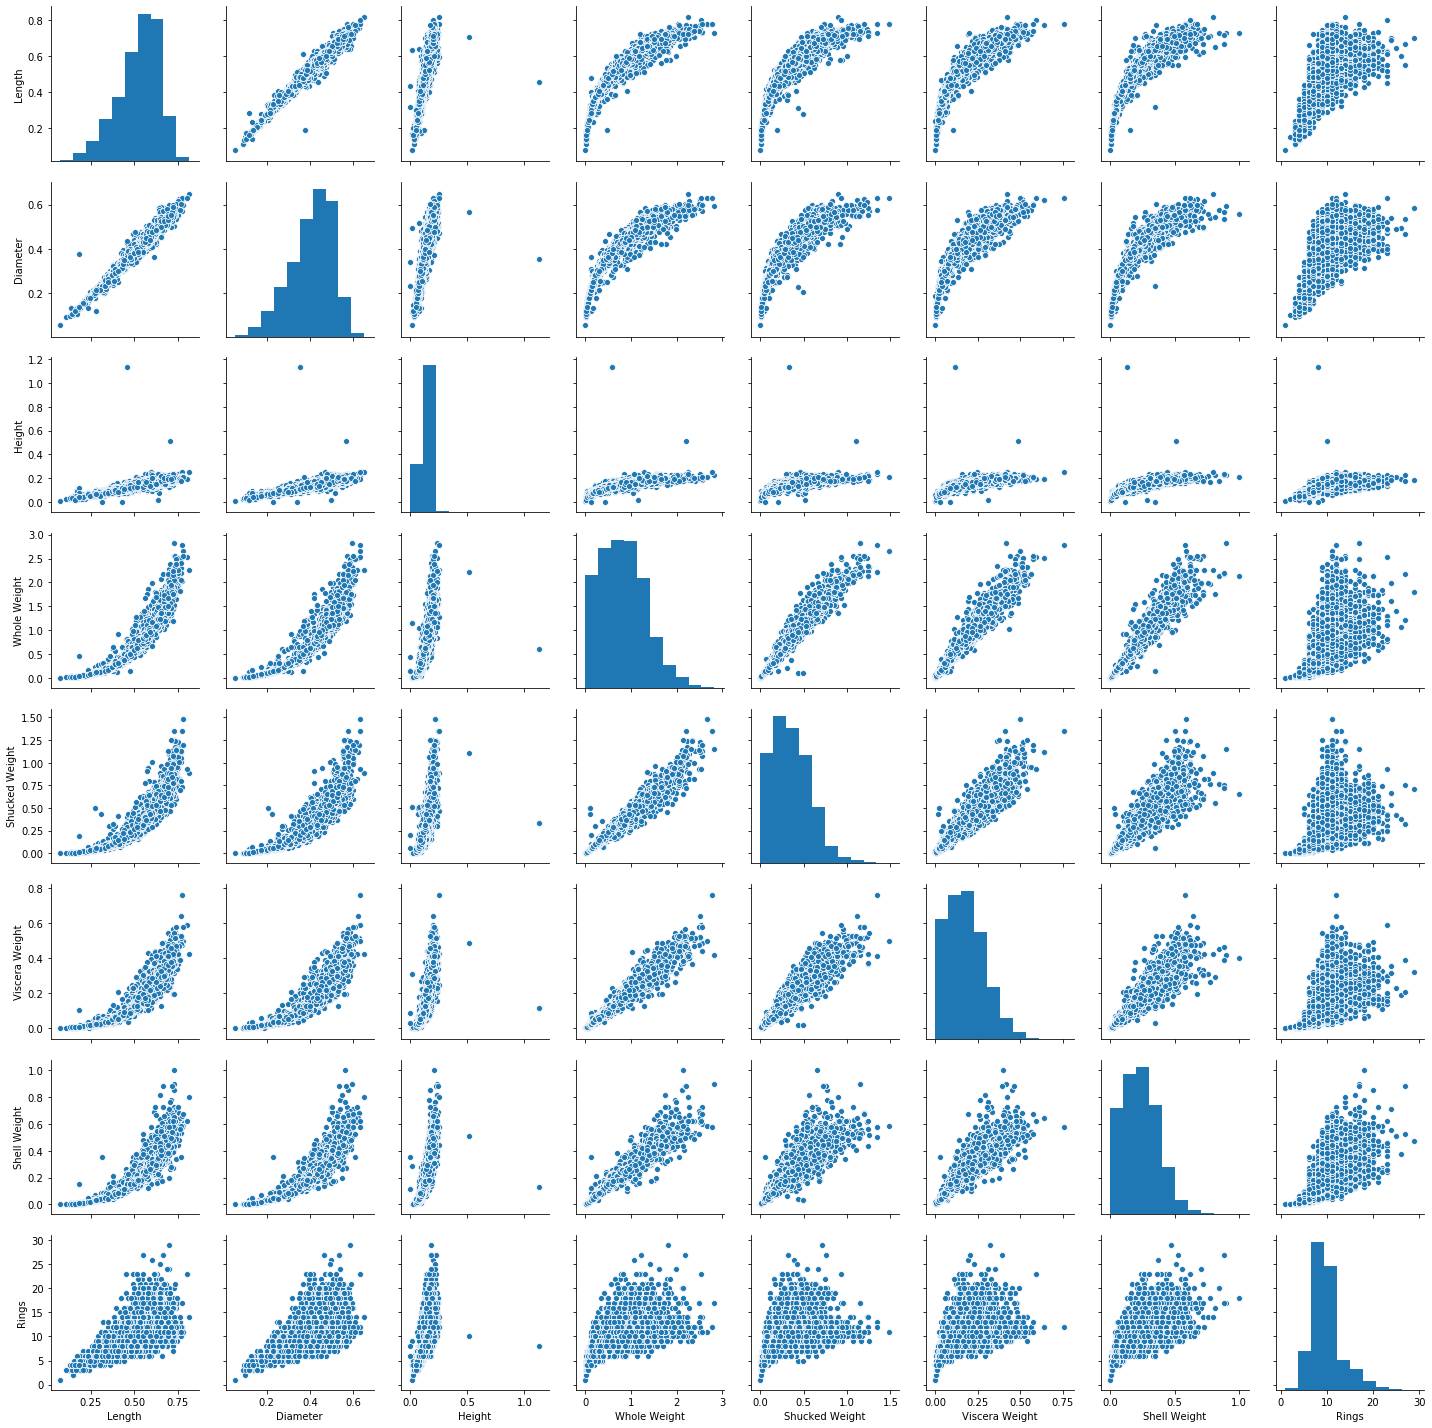

In [6]:
sns.pairplot(df)

In [15]:
x = df.iloc[:,1:]



In [16]:
x

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [17]:
from sklearn.cluster import KMeans

In [18]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [19]:
wcss

[44860.378975952,
 18861.998927978813,
 9889.828962494772,
 6340.08192745964,
 4384.829916627341,
 3438.3897376378372,
 2706.86776669821,
 2331.3658828700886,
 2021.483195630449,
 1717.881477948867]

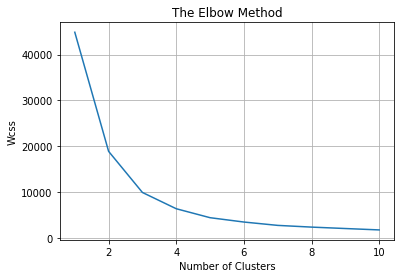

In [20]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Wcss")
plt.grid(True)
plt.show()

In [21]:
kmeans = KMeans(n_clusters=5, random_state=1)
ykmeans = kmeans.fit_predict(x)

In [22]:
ykmeans

array([4, 3, 0, ..., 0, 2, 2])

In [29]:
df.drop(["Gender"], axis=1, inplace=True)

In [30]:
df

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Target
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,4
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,3
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,3
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,2
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [31]:
df["Target"] = ykmeans

In [32]:
df

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Target
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,4
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,3
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,3
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,2
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [33]:
kmeans.cluster_centers_

array([[ 0.52513524,  0.40695306,  0.1363206 ,  0.75655091,  0.34538743,
         0.16552506,  0.21034606,  8.54813047],
       [ 0.60159794,  0.47641753,  0.17396907,  1.22819588,  0.45335567,
         0.24902577,  0.40082474, 18.99484536],
       [ 0.58616354,  0.45929395,  0.15798991,  1.07380944,  0.47204971,
         0.2365598 ,  0.30326369, 10.73559078],
       [ 0.36833135,  0.27827175,  0.09172825,  0.29130274,  0.13349583,
         0.0627944 ,  0.08266031,  6.12872467],
       [ 0.57972946,  0.45848697,  0.16313627,  1.07725651,  0.42438277,
         0.23433667,  0.33096092, 14.06813627]])

In [34]:
x = df.iloc[:,1:]
y = df["Target"]

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from sklearn.metrics import classification_report,confusion_matrix

In [37]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))

In [38]:
logreg=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()

In [39]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      0.98      0.99        43
           2       1.00      1.00      1.00       353
           3       1.00      1.00      1.00       237
           4       1.00      1.00      1.00       121

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045



In [40]:
mymodel(knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00       353
           3       1.00      1.00      1.00       237
           4       1.00      1.00      1.00       121

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045



In [41]:
mymodel(svm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00       353
           3       1.00      1.00      1.00       237
           4       1.00      1.00      1.00       121

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045

